# 📘 Course Completion Time Prediction for SkillBridge

**Objective:**  
SkillBridge, an online learning platform, wants to predict how long it will take for individual students to complete a course. This helps offer personalized guidance, support at-risk learners, and optimize student satisfaction.

**We will:**  
- Explore the dataset
- Perform feature engineering
- Train multiple regression models
- Predict completion times
- Recommend student support actions


In [39]:
# Step 1: Upload CSV file
from google.colab import files
uploaded = files.upload()

# Step 2: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 3: Load dataset using uploaded file name
filename = list(uploaded.keys())[0]
df = pd.read_csv('Course Completion Time Prediction for SkillBridge.csv')
df.head()


Saving Course Completion Time Prediction for SkillBridge.csv to Course Completion Time Prediction for SkillBridge (2).csv


,gender,age,education_level,employed,internet_speed_mbps,previous_course_completion_rate,average_study_hours_per_week,quiz_score_average,video_watch_percentage,forum_participation_rate,assignment_submission_rate,estimated_completion_days
0,Male,31,Undergraduate,No,55.46,0.36,12.22,82.67,73.27,0.67,0.55,33.0
1,Other,22,High School,No,41.97,0.81,13.05,70.16,54.73,0.52,0.72,21.3
2,Male,51,Undergraduate,Yes,47.25,0.94,8.75,57.15,72.95,0.63,0.78,29.5
3,Male,16,Undergraduate,No,37.62,0.44,1.92,85.24,80.09,0.57,0.73,44.9
4,Male,27,Undergraduate,Yes,20.12,0.76,8.25,61.39,57.79,0.34,0.70,40.2


In [40]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   gender                           1000 non-null   object 
 1   age                              1000 non-null   int64  
 2   education_level                  1000 non-null   object 
 3   employed                         1000 non-null   object 
 4   internet_speed_mbps              1000 non-null   float64
 5   previous_course_completion_rate  1000 non-null   float64
 6   average_study_hours_per_week     1000 non-null   float64
 7   quiz_score_average               1000 non-null   float64
 8   video_watch_percentage           1000 non-null   float64
 9   forum_participation_rate         1000 non-null   float64
 10  assignment_submission_rate       1000 non-null   float64
 11  estimated_completion_days        1000 non-null   float64
dtypes: float64(8), int64(

,age,internet_speed_mbps,previous_course_completion_rate,average_study_hours_per_week,quiz_score_average,video_watch_percentage,forum_participation_rate,assignment_submission_rate,estimated_completion_days
count,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.045000,29.85440,0.647590,8.01612,74.305100,70.263080,0.484260,0.642620,38.129300
std,12.357657,10.09578,0.201607,2.93177,14.416189,17.339486,0.292404,0.200705,10.129324
min,16.000000,5.00000,0.300000,1.00000,50.020000,40.060000,0.000000,0.300000,15.000000
25%,27.000000,23.23250,0.470000,6.01000,61.890000,56.225000,0.220000,0.470000,31.000000
50%,36.000000,30.08000,0.655000,8.08500,73.985000,70.015000,0.485000,0.640000,38.300000
75%,48.000000,36.82000,0.810000,9.88000,86.832500,85.352500,0.730000,0.810000,45.000000
max,59.000000,58.82000,1.000000,18.29000,99.870000,99.930000,1.000000,1.000000,69.800000


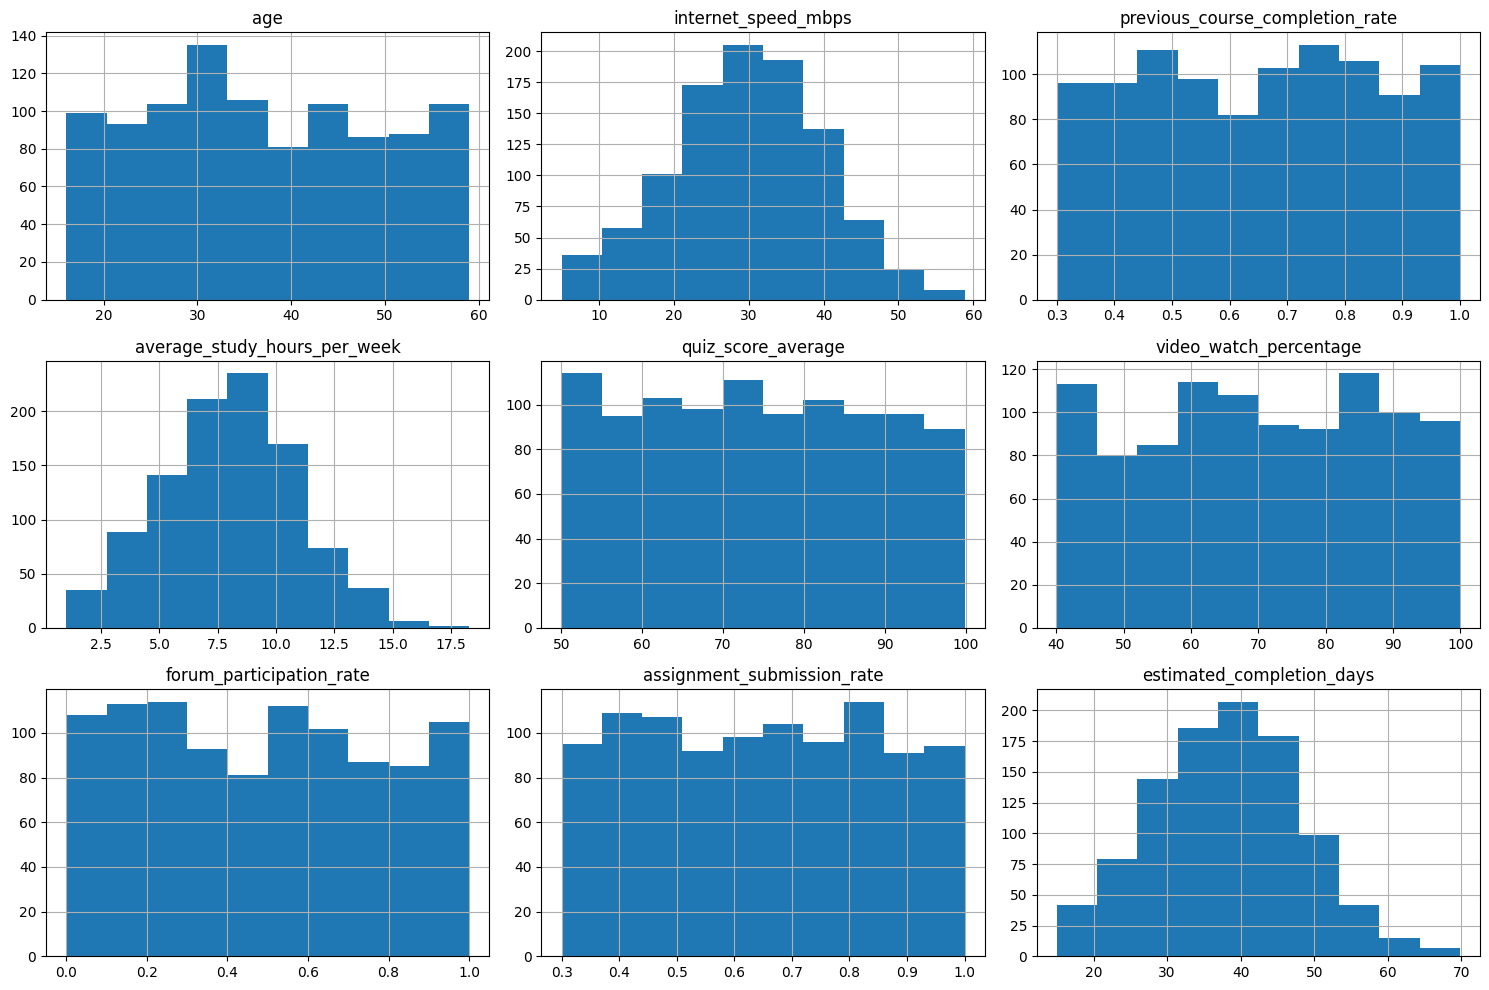

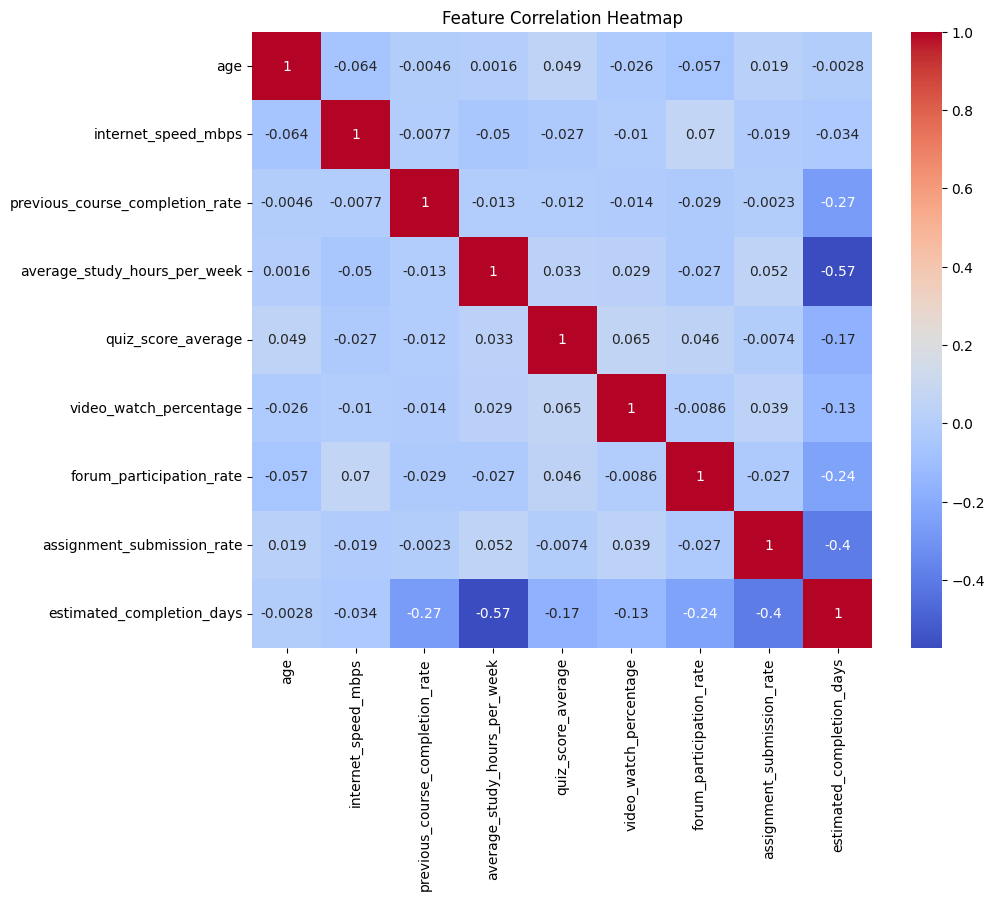

In [41]:
# Histograms
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [42]:
# Define features and target
X = df.drop('estimated_completion_days', axis=1)
y = df['estimated_completion_days']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(exclude='object').columns.tolist()

# Define preprocessing
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), categorical_cols),
    ('scale', StandardScaler(), numeric_cols)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Define pipeline
model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

MAE: 5.156595000000002
RMSE: 6.342600608189043
R²: 0.6075696619305924


In [44]:
# Example new student
sample = pd.DataFrame([{
    'gender': 'Female',
    'age': 25,
    'education_level': 'Undergraduate',
    'employed': 'Yes',
    'internet_speed_mbps': 45.0,
    'previous_course_completion_rate': 0.75,
    'average_study_hours_per_week': 10,
    'quiz_score_average': 80,
    'video_watch_percentage': 90,
    'forum_participation_rate': 0.5,
    'assignment_submission_rate': 0.85
}])

predicted_days = model.predict(sample)[0]
print(f"📅 Estimated Completion Time: {predicted_days:.2f} days")

📅 Estimated Completion Time: 28.28 days


## ✅ Conclusion

- Our model successfully predicts individual student completion times.
- Features such as study hours, submission rates, and quiz scores are strong predictors.
- This system enables **proactive support** for students at risk of delays.

You can integrate this model into your platform to personalize learning timelines and support interventions.
